In [1]:
#%matplotlib notebook
import numpy as np
import pandas as pd
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import Subset, DataLoader
import sklearn.model_selection
#from ignite.engine import Engine, Events
#from ignite.metrics import Loss, Accuracy
import random, os, cv2
import matplotlib.image as mpimg
import torchvision.transforms as transforms
import torchvision.models as models

In [2]:
torch.cuda.is_available()

True

In [3]:
from utilidades import *

In [4]:
train_transform = transform = transforms.Compose([
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomVerticalFlip(p=0.5),
            transforms.RandomApply(torch.nn.ModuleList([transforms.ColorJitter(), 
                                                        transforms.GaussianBlur(3)]), p=0.1),
            #transforms.Resize(256),
            transforms.CenterCrop(240),
            transforms.ToTensor(),
            transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
            transforms.RandomErasing(p=0.14, value='random')
        ])


else_transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(240),
            transforms.ToTensor(),
            transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
        ])

In [5]:
# Datos de entrenamiento
train_data = datasets.ImageFolder(root='./data_birds/train' , transform=train_transform)
train_loader = DataLoader(train_data, shuffle=True, batch_size=64)

# Datos de validación
valid_data = datasets.ImageFolder(root='./data_birds/valid' , transform=else_transform)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=64)

# Datos de test
test_data = datasets.ImageFolder(root='./data_birds/test' , transform=else_transform)
test_loader = DataLoader(test_data, shuffle=True, batch_size=4)

In [6]:
# Diccionario de clases
df = pd.read_csv("data_birds/class_dict.csv")
labels = np.unique(df['class'])
idx_to_class = {i:j for i, j in enumerate(labels)}
class_to_idx = {value:key for key,value in idx_to_class.items()}

In [6]:
torch.cuda.empty_cache()

In [ ]:
from tqdm import tqdm
epochs = 2
for e in range(epochs):
    train_loss = 0.0
    for data, labels in tqdm(train_loader):
        # Transfer Data to GPU if available
        if torch.cuda.is_available():
            data, labels = data.cuda(), labels.cuda()
        
        # Clear the gradients
        optimizer.zero_grad()
        # Forward Pass
        target = model(data)
        # Find the Loss
        loss = criterion(target,labels)
        # Calculate gradients 
        loss.backward()
        # Update Weights
        optimizer.step()
        # Calculate Loss
        train_loss += loss.item()
    
    print(f'Epoch {e+1} \t\t Training Loss: {train_loss / len(train_loader)}')

Text(0.5, 1.0, 'Distribución de clases')

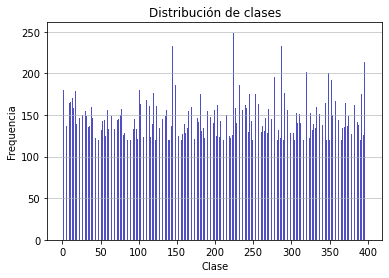

In [51]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=un, bins=400, weights=coun, color='#0504aa',
                            alpha=0.7, rwidth=0.5)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Clase')
plt.ylabel('Frequencia')
plt.title('Distribución de clases')

In [7]:
print('The shape of tensor for 50th image in train dataset: ',test_data[49][0].shape)
print('The label for 50th image in train dataset: ',test_data[49][1])

The shape of tensor for 50th image in train dataset:  torch.Size([3, 224, 224])
The label for 50th image in train dataset:  9


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


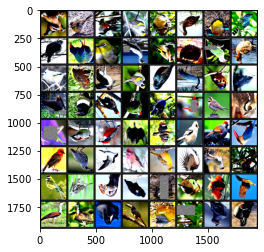

212 294 142 183


In [14]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{labels[j]}' for j in range(4)))

In [16]:
import torch.nn as nn
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model1.parameters(), lr=0.001, momentum=0.9)

In [17]:
model1 = models.alexnet()

model1.classifier = nn.Sequential(
    nn.Linear(in_features=9216, out_features=4096, bias=True),
    nn.ReLU(inplace=True),
    nn.Linear(in_features=4096, out_features=400, bias=True)
  )
device = torch.device('cuda:0')
model1.to(device)

if torch.cuda.is_available():
    model1.cuda()

In [18]:
torch.backends.cudnn.benchmark = True
model_eff = models.efficientnet_b1(pretrained=True)
for param in model_eff.parameters():
    param.requires_grad = False
n_inputs = model_eff.classifier[1].in_features
model_eff.classifier = nn.Sequential(
    nn.Linear(n_inputs,2048),
    nn.SiLU(),
    nn.Dropout(0.2),
    nn.Linear(2048, 400)
)

model = model_eff.to(device)
print(model_eff.classifier)

C:\Users\Diegomora\miniconda3\envs\keras\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
C:\Users\Diegomora\miniconda3\envs\keras\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=EfficientNet_B1_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B1_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential(
  (0): Linear(in_features=1280, out_features=2048, bias=True)
  (1): SiLU()
  (2): Dropout(p=0.2, inplace=False)
  (3): Linear(in_features=2048, out_features=400, bias=True)
)


In [22]:
train(5,model1)

Completed training batch 0 Training Loss is: 5.9915 Validation Loss is: 5.9915 Accuracy is 0 %


KeyboardInterrupt: 

In [89]:
torch.save(model_ft.state_dict(), 'vgg_0.pt')

In [11]:
print(model1)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=4096, bias=True)
    (1): ReLU(inplace=True)
    (2): Lin

In [9]:
import torch.nn as nn
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model1.parameters(), lr=0.001, momentum=0.9)

In [20]:
# Function to save the model 
def saveModel(model): 
    path = "./alx_valid.pt" 
    torch.save(model.state_dict(), path) 

In [21]:
def train(num_epochs, model): 
    best_accuracy = 0.0    
    for epoch in range(10):  # loop over the dataset multiple times
        running_train_loss = 0.0 
        running_accuracy = 0.0 
        running_vall_loss = 0.0 
        total = 0 

        #running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data                        
            inputs, labels = inputs.cuda(), labels.cuda()

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_train_loss += loss.item()
            #if i % 2000 == 1999:    # print every 2000 mini-batches
             #   print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
             #   running_loss = 0.0
            
        train_loss_value = running_train_loss/len(train_loader) 
        
        # Validation Loop 
        with torch.no_grad(): 
            model1.eval() 
            for data in valid_loader: 
                inputs, outputs = data[0].cuda(), data[1].cuda()
                predicted_outputs = model(inputs) 
                val_loss = criterion(predicted_outputs, outputs) 

               # The label with the highest value will be our prediction 
                _, predicted = torch.max(predicted_outputs, 1) 
                running_vall_loss += val_loss.item()  
                total += outputs.size(0) 
                running_accuracy += (predicted == outputs).sum().item() 

        # Calculate validation loss value 
        val_loss_value = running_vall_loss/len(valid_loader) 

        # Calculate accuracy as the number of correct predictions in the validation batch divided by the total number of predictions done.  
        accuracy = (100 * running_accuracy / total)     

        # Save the model if the accuracy is the best 
        if accuracy > best_accuracy: 
            saveModel(model) 
            best_accuracy = accuracy 

        # Print the statistics of the epoch 
        print('Completed training batch', epoch, 'Training Loss is: %.4f' %train_loss_value, 'Validation Loss is: %.4f' %val_loss_value, 'Accuracy is %d %%' % (accuracy))
    print('Finished Training')

In [29]:
# Se guarda el modelo
torch.save(model1.state_dict(), 'best_alex_15-07-22.pt')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


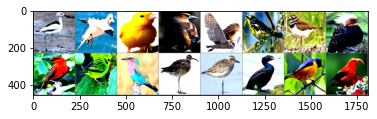

GroundTruth:  -,CRAB PLOVER -,NORTHERN GANNET -,CANARY -,HAWFINCH


In [51]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'-,{idx_to_class[labels[j].item()]:5s}' for j in range(4)))

In [49]:
model_test = models.alexnet()
model_test.classifier = nn.Sequential(
    nn.Linear(in_features=9216, out_features=4096, bias=True),
    nn.ReLU(inplace=True),
    nn.Linear(in_features=4096, out_features=400, bias=True)
  )

In [50]:
model_test.load_state_dict(torch.load('alx_valid.pt'))

<All keys matched successfully>

In [55]:
model_test.to(device)
output = model_test(images.cuda())

In [58]:
_, y_pred = torch.max(output, 1)

In [59]:
print('GroundTruth: ', ' '.join(f',{idx_to_class[y_pred[j].item()]:5s}' for j in range(4)))

GroundTruth:  ,GREATOR SAGE GROUSE ,HORNED SUNGEM ,GREATOR SAGE GROUSE ,GREATOR SAGE GROUSE


In [35]:
device = torch.device('cuda:0')
model1.to(device)

if torch.cuda.is_available():
    model1.cuda()
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].cuda(), data[1].cuda()
        # calculate outputs by running images through the network
        outputs = model1(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 77 %


In [ ]:
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [24]:
from ignite.engine import Engine, Events
from ignite.metrics import Loss, Accuracy


optimizer = torch.optim.Adam(model1.parameters(), lr=8e-4)
criterion = torch.nn.CrossEntropyLoss(reduction='sum')
max_epochs = 100  
#device = torch.device('cpu')
device = torch.device('cuda:0')

model1 = model1.to(device)

# Esto es lo que hace el engine de entrenamiento
def train_one_step(engine, batch):
    optimizer.zero_grad()
    
    x, y = batch
    x, y = x.to(device), y.to(device)
    yhat = model1.forward(x)
    loss = criterion(yhat, y)
    loss.backward()
    optimizer.step()
    return loss.item() # Este output puede llamar luego como trainer.state.output

# Esto es lo que hace el engine de evaluación
def evaluate_one_step(engine, batch):
    with torch.no_grad():
        x, y = batch
        x, y = x.to(device), y.to(device)
        yhat = model1.forward(x)
        #loss = criterion(yhat, y)
        return yhat, y

trainer = Engine(train_one_step)
evaluator = Engine(evaluate_one_step)
metrics = {'Loss': Loss(criterion), 'Acc': Accuracy()}
for name, metric in metrics.items():
    metric.attach(evaluator, name)

In [25]:
import time
from torch.utils.tensorboard import SummaryWriter
from ignite.handlers import ModelCheckpoint, EarlyStopping


# Contexto de escritura de datos para tensorboard
print("run_", time.time_ns())
with SummaryWriter(log_dir=f'/tmp/tensorboard/run_{time.time_ns()}') as writer:

    @trainer.on(Events.EPOCH_COMPLETED(every=1)) # Cada 1 epocas
    def log_results(engine):
        
        # Evaluo el conjunto de entrenamiento
        evaluator.run(train_loader) 
        writer.add_scalar("train/loss", evaluator.state.metrics['Loss'], engine.state.epoch)
        writer.add_scalar("train/accy", evaluator.state.metrics['Acc'], engine.state.epoch)
        
        # Evaluo el conjunto de validación
        evaluator.run(valid_loader) 
        writer.add_scalar("valid/loss", evaluator.state.metrics['Loss'], engine.state.epoch)
        writer.add_scalar("valid/accy", evaluator.state.metrics['Acc'], engine.state.epoch)
        
    # Guardo el mejor modelo en validación
    best_model_handler = ModelCheckpoint(dirname='.', require_empty=False, filename_prefix="best", n_saved=1,
                                         score_function=lambda engine: -engine.state.metrics['Loss'],
                                         score_name="val_loss")

    # Lo siguiente se ejecuta cada ves que termine el loop de validación
    evaluator.add_event_handler(Events.COMPLETED, 
                                best_model_handler, {'alexnet': model1})
    
    
    early_stopping_handler = EarlyStopping(patience=5, score_function= lambda engine: -engine.state.metrics['Loss'] , trainer=evaluator)

    evaluator.add_event_handler(Events.COMPLETED, early_stopping_handler)

    trainer.run(train_loader, max_epochs=max_epochs)

run_ 1658112135914571400


Engine run is terminating due to exception: 
Engine run is terminating due to exception: 


KeyboardInterrupt: 

In [120]:
torch.save(model1.state_dict(), 'bird_test.pt')

In [23]:
device = torch.device('cuda:0')
model1.to(device)

if torch.cuda.is_available():
    model1.cuda()
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0].cuda(), data[1].cuda()
        # calculate outputs by running images through the network
        outputs = model1(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 2 %


In [121]:
model_test = models.alexnet()
model_test.load_state_dict(torch.load('bird_test.pt'))

<All keys matched successfully>

In [28]:
train_acc = [0.5439, 0.6810, 0.7145, 0.7995, 0.8199, 0.8359, .8708, .8847, .892, .9095]
val_acc = [.884, .901, .8775, .9060, .9105, .9090, .928, .908, .9275, .93]
train_loss = [2.863914239044801,
 2.3411474211898544,
 2.246945329681687,
 1.966057183996181,
 1.878423477285748,
 1.826321792266071,
 1.7096397208050276,
 1.6653962045481265,
 1.6373838871858328,
 1.5805121536017068]

val_loss = [1.7716527709960936,
 1.850911904335022,
 1.9761864891052245,
 1.9445613136291504,
 1.8976926774978637,
 1.8656081972122192,
 1.7080133209228516,
 1.8376164503097534,
 1.6133998851776123,
 1.6422767124176025]

Text(0.5, 1.0, 'Gráfica de precisión')

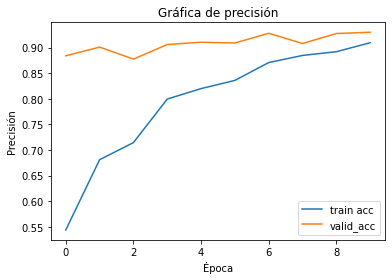

In [41]:
fig, ax = plt.subplots()
ax.plot(train_acc, label="train acc")
ax.plot(val_acc, label="valid_acc")
ax.legend()
ax.set_ylabel("Precisión")
ax.set_xlabel("Época")
ax.set_title("Gráfica de precisión")

Text(0.5, 1.0, 'Gráfica de pérdida')

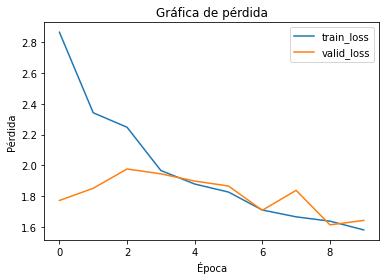

In [39]:
fig, ax = plt.subplots()
ax.plot(train_loss, label="train_loss")
ax.plot(val_loss, label="valid_loss")
ax.legend()
ax.set_ylabel("Pérdida")
ax.set_xlabel("Época")
ax.set_title("Gráfica de pérdida")